<a href="https://colab.research.google.com/github/jyukki97/deeplearning/blob/main/doit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 경사 하강법

913.5973364345905 123.39414383177204
287.8416643899983


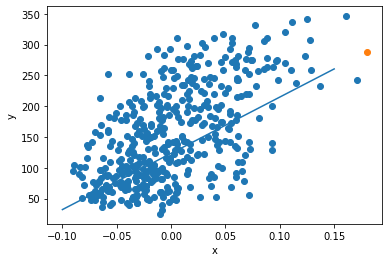

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

diabets = load_diabetes()

x = diabets.data[:, 2]
y = diabets.target

for i in  range(1,100):
  for x_i, y_i in zip(x,y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b+1*err
print(w,b)

x_new = 0.18
y_pred = x_new * w + b
print(y_pred)

plt.scatter(x,y)
plt.scatter(x_new, y_pred)
pt1 = (-0.1, -0.1 * w +b)
pt2 = (0.15, 0.15 * w +b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()


# 뉴런

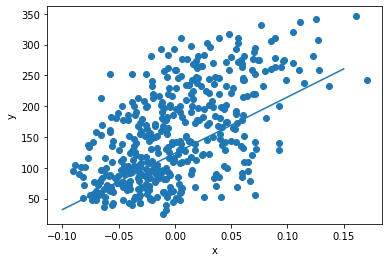

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

class Neuron:
  def __init__(self):
    self.w = 1.0
    self.b = 1.0
  
  def forpass(self, x):
    y_hat = x * self.w + self.b
    return y_hat
  
  def backprob(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  def fit(self, x, y, epochs=100):
    for i in range(epochs):
      for x_i, y_i in zip(x,y):
        y_hat = self.forpass(x_i)
        err = -(y_i - y_hat)
        w_grad, b_grad = self.backprob(x_i, err)
        self.w -= w_grad
        self.b -= b_grad

diabets = load_diabetes()

x = diabets.data[:, 2]
y = diabets.target

neuron = Neuron()
neuron.fit(x, y)

plt.scatter(x,y)
pt1 = (-0.1, -0.1 * neuron.w + neuron.b)
pt2 = (0.15, 0.15 * neuron.w + neuron.b)
plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 로지스틱 회귀

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

class LogisticNeuron:
  def __init__(self):
    self.w = None
    self.b = None
  
  def forpass(self, x):
    z = np.sum(x * self.w) + self.b
    return z

  def backprob(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  def fit(self, x, y, epochs = 100):
    self.w = np.ones(x.shape[1])
    self.b = 0
    for i in range(epochs):
      for x_i, y_i in zip(x, y):
        z = self.forpass(x_i)
        a = self.activation(z)
        err = -(y_i - a)
        w_grad, b_grad = self.backprob(x_i, err)
        self.w -= w_grad
        self.b -= b_grad

  def activation(self, z):
    a = 1 / (1 + np.exp(-z))
    return a

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    a = self.activation(np.array(z))
    return a > 0.5

cancer = load_breast_cancer()

x = cancer.data
y = cancer.target

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.2, random_state = 42)

neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

np.mean(neuron.predict(x_test) == y_test)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


0.8245614035087719

# 단일층 신경망

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in exp


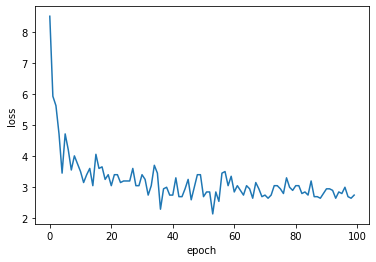

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

class SingleLayer:
  def __init__(self):
    self.w = None
    self.b = None
    self.losses = []
  
  def forpass(self, x):
    z = np.sum(x * self.w) + self.b
    return z

  def backprob(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  def add_bias(self, x):
    return np.c_[np.ones((x.shape[0], 1)), x]

  def activation(self, z):
    a = 1 / (1 + np.exp(-z))
    return a

  def fit(self, x, y, epochs = 100):
    self.w = np.ones(x.shape[1])
    self.b = 0
    for i in range(epochs):
      loss = 0
      indexes = np.random.permutation(np.arange(len(x)))
      for i in indexes:
        z = self.forpass(x[i])
        a = self.activation(z)
        err = -(y[i] - a)
        w_grad, b_grad = self.backprob(x[i], err)
        self.w -= w_grad
        self.b -= b_grad
        a = np.clip(a, 1e-10, 1-1e-10)

        loss += -(y[i] * np.log(a) + (1 - y[i]) * np.log(1-a))
      self.losses.append(loss / len(y))

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]
    return np.array(z) > 0

  def score(self, x, y):
    return np.mean(self.predict(x) == y)

cancer = load_breast_cancer()

x = cancer.data
y = cancer.target

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, test_size = 0.2, random_state = 42)

layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

# 사이킷런 경사하강법(SGDClassifier)

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

cancer = load_breast_cancer()

x = cancer.data
y = cancer.target

x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify = y, test_size = 0.2, random_state = 42)

x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify = y_train_all, test_size = 0.2, random_state = 42)


sgd = SGDClassifier(loss = 'log', random_state=42)

sgd.fit(x_train, y_train)
sgd.score(x_val, y_val)


0.6923076923076923